# COGS 108 - Final Project 

# Overview

Our group decided to analyze how important economic factors might have an influence on an interesting topic such as their performance at the Olympics. The datasets have information gathered from various countries around the world that have won medals in the Olympic games and we have information about that country's GDP in each of those years. With this we can observe how changes in a country's GDP have any influence over the number of medals won in that year. We are using the number of medals (gold, silver, bronze) to indicate how successful the country performed in the Olympic Games.

# Names

- Niyonika Sheth
- Sudiksha Sarvepalli
- Maneesha Nagabandi
- Charul Sharma
- Jaikrish Chitrarasu

# Research Question

**Does economic status have an influence on how well a country performs at the Olympics?**


## Background and Prior Work

World Development Indicators (WDI) by World Bank includes data spanning up to 56 years—from 1960 to 2016. WDI frames global trends with indicators on population, population density, urbanization, GNI, and GDP. These indicators measure the world’s economy and progress toward improving lives, achieving sustainable development, providing support for vulnerable populations, and reducing gender disparities. World Development Indicators Data is the primary World Bank collection of development indicators, compiled from officially-recognized international sources. It presents the most current and accurate global development data available, and includes national, regional and global estimates. From this vast dataset comes the simplified dataset with Country, regional and world GDP in current US Dollars ($). We found this simplified data as a "Certified" dataset on Datahub. 
	The dataset on Summer Olympics Medals contains a workbook that contains 2 files. The first file is a list of all the medal winners in the Summer Olympics from 1976 Montreal to 2008 Beijing. It includes each and every medal awarded within the period. There's another file by the name 'Country Codes' which was used as a lookup for the countries in the 'Medalists' file.
	Before we started this project, our group had a general understanding that the countries with the best economies were the ones that had the most representation in the Olympics. We thought that most winners were mainly from first world developed countries that could spare the economic resources on an elite training program.. Of course there are outliers, like Usain Bolt, who come from developing nations that generally don’t have training programs on par with those of the developed nations.

References (include links):
- 1) https://www.smithsonianmag.com/science-nature/can-statistical-model-accurately-predict-olympic-medal-counts-180949627/
	This article discusses a model that was created by data scientists that wanted to see if information such as GDP, latitude, geographic area, and total value of exports could be used to predict the 2014 Sochi Winter Olympics. They had a similar goal to ours, but I don’t think that latitude or geographic area will be important factors to indicate a Country will do well in the olympics. 

- 2) http://re-design.dimiter.eu/?p=868
This person tries to find a correlation between Population and Olympic Medals. He concludes there is a strong correlation. Our Project will be slightly different because we will be looking for a correlation between GDP and Olympic Medals.

# Hypothesis


Our main hypothesis is that a country’s GDP has an influence on the overall performance of that country in the Olympics, in that better economic performance can result in better resources to support and train athletes and lead to better Olympic performance. We predict higher economic performance for a year would have a positive correlation with the performance of the athletes, measured by the number of gold, silver, and/or bronze medals received that year. 


# Dataset(s)

**Dataset 1**
Link to Dataset: https://www.kaggle.com/divyansh22/summer-olympics-medals
Name of Dataset: Summer-Olympic-medals-1976-to-2008.xlsx
Observations: 15316 rows/observations, 11 columns/features
Variables: City, Year, Sport, Discipline, Event, Athlete, Gender, Country_Code, Country, Event_gender, Medal

Since the dataset provides information about the Country, year, and Medals, we can perform EDA to observe medals are won by each country and make visualizations about the GDP and the number of medals won. The dataset also provides information about the Sport and Discipline so we could possibly try to observe any trends in how different countries are better at some events than others regardless of their GDP. Additionally, since the dataset stores information for many years we can observe how any changes within each country’s GDP over the years affected their involvement in the Olympics over time and compare with the other countries.

**Dataset 2**
Ideal Dataset about worldwide GDP over the past decade and has features/variables at least for the Country_Code or Country, Year, and GDP. Each observation would represent a country’s GDP for a certain year.

Link to Dataset:https://datahub.io/core/gdp#readme
Name of Dataset: GDP (current US$)
Observations: 11,508 rows/observations, 4 columns/features
Variables: Country Name, Country Code, Year, Value(GDP)

This dataset lists the GDP values for countries over a range of years, this can be used to measure each country’s economy and progress in developments. Since GDP is a good indicator of the economic status of a country, and since this dataset has a lot of information for each country and each type of indicator has its own row for each country and year, we can filter to only focus on the GDP for each unique country in the dataset.

Additionally, since this dataset also has the country_code/country_name, we would be able to join tables with the Olympics dataset and gather information from both datasets. We would be able to filter both the datasets to have overlapping years and countries with each other so we could compare both the Olympic performance and the GDP for a country during the same years to help make observations about our research question.

We can use information from the Olympics dataset and the country’s GDP dataset to visualize any correlations between the GDP of a country and how many medals are received for each country over the various Olympic years.

# Setup

In [65]:
pip install patsy


The following command must be run outside of the IPython shell:

    $ pip install patsy

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [66]:
pip install statsmodels


The following command must be run outside of the IPython shell:

    $ pip install statsmodels

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [67]:
## YOUR CODE HERE
import pandas as pd
import numpy as np
import seaborn as sns

import patsy
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, chisquare, normaltest


# Data Cleaning

Describe your data cleaning steps here.

In [4]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

In [5]:
olympics_df = pd.read_csv('Summer-Olympic-medals-1976-to-2008.csv', encoding='ISO-8859-1')
olympics_df

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze
...,...,...,...,...,...,...,...,...,...,...,...
15428,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"GUENOT, Christophe",Men,FRA,France,M,Bronze
15429,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"KVIRKELIA, Manuchar",Men,GEO,Georgia,M,Gold
15430,Beijing,2008.0,Wrestling,Wrestling Gre-R,55 - 60kg,"RAHIMOV, Vitaliy",Men,AZE,Azerbaijan,M,Silver
15431,Beijing,2008.0,Wrestling,Wrestling Gre-R,60 - 66kg,"GUENOT, Steeve",Men,FRA,France,M,Gold


In [6]:
(olympics_df['Country_Code'] == 'SST').sum()

0

### Perform analysis to check for null values

In [7]:
olympics_df.isnull().sum()

City            117
Year            117
Sport           117
Discipline      117
Event           117
Athlete         117
Gender          117
Country_Code    117
Country         117
Event_gender    117
Medal           117
dtype: int64

When checking for null values, we found that there were 117 rows that had null values for every column so we dropped all those rows with null values.

In [8]:
olympics_df = olympics_df.dropna()

In [9]:
#check results from dropping null values
olympics_df.isnull().sum()

City            0
Year            0
Sport           0
Discipline      0
Event           0
Athlete         0
Gender          0
Country_Code    0
Country         0
Event_gender    0
Medal           0
dtype: int64

In [10]:
gdp = pd.read_csv('gdp_csv.csv')

In [11]:
gdp = gdp.iloc[2306:]
gdp.head()

,Country Name,Country Code,Year,Value
2306,Afghanistan,AFG,1960,5.377778e+08
2307,Afghanistan,AFG,1961,5.488889e+08
2308,Afghanistan,AFG,1962,5.466667e+08
2309,Afghanistan,AFG,1963,7.511112e+08
2310,Afghanistan,AFG,1964,8.000000e+08


In [12]:
#check value type of GDP value column and it is already of type float so this column does not need any transformations
#for our data anlysis
gdp["Value"].dtype

dtype('float64')

We compared what countries were actually involved in the dataset about the olympic games and filtered out the gdp dataset so that we only look at the information from the overlapping countries between these two datasets.

In [13]:
num_olympic_countries = olympics_df['Country_Code'].nunique()
num_olympic_countries

128

In [14]:
olympic_countries = olympics_df['Country_Code'].unique()

In [15]:
num_gdp_countries = gdp.loc[gdp['Country Code'].isin(olympic_countries)]['Country Code'].nunique()
num_gdp_countries 

76

#### Merge both the dataframes to result in a final dataframe with GDP and olympics information

In [16]:
#merged the datasets on the 'Year' and 'Country Code' features
final_df = olympics_df.merge(gdp, how='inner', left_on=['Country_Code','Year'], right_on=['Country Code', 'Year'])
final_df.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal,Country Name,Country Code,Value
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold,United States,USA,1.877587e+12
1,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze,United States,USA,1.877587e+12
2,Montreal,1976.0,Aquatics,Diving,10m platform,"LOUGANIS, Gregory",Men,USA,United States,M,Silver,United States,USA,1.877587e+12
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"POTTER-MCINGVALE, Cynthia",Women,USA,United States,W,Bronze,United States,USA,1.877587e+12
4,Montreal,1976.0,Aquatics,Diving,3m springboard,"CHANDLER, Jennifer Kay",Women,USA,United States,W,Gold,United States,USA,1.877587e+12


When we merged two datasets on the Country Code the variable names were different in each of these datasets so it repeated two columns for country codes in the final_df so we can drop one of those repetitive columns.

In [17]:
final_df = final_df.drop(['Country Code'] , axis = 1)
final_df

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal,Country Name,Value
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold,United States,1.877587e+12
1,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze,United States,1.877587e+12
2,Montreal,1976.0,Aquatics,Diving,10m platform,"LOUGANIS, Gregory",Men,USA,United States,M,Silver,United States,1.877587e+12
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"POTTER-MCINGVALE, Cynthia",Women,USA,United States,W,Bronze,United States,1.877587e+12
4,Montreal,1976.0,Aquatics,Diving,3m springboard,"CHANDLER, Jennifer Kay",Women,USA,United States,W,Gold,United States,1.877587e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,Beijing,2008.0,Taekwondo,Taekwondo,- 49 kg,"CONTRERAS RIVERO, Dalia",Women,VEN,Venezuela,W,Bronze,"Venezuela, RB",3.159534e+11
9982,Beijing,2008.0,Weightlifting,Weightlifting,62kg,"SALAZAR, Diego",Men,COL,Colombia,M,Silver,Colombia,2.439824e+11
9983,Beijing,2008.0,Wrestling,Wrestling Free.,48 - 55kg,"RENTERIA, Jackeline",Women,COL,Colombia,W,Bronze,Colombia,2.439824e+11
9984,Beijing,2008.0,Wrestling,Wrestling Gre-R,60 - 66kg,"BEGALIEV, Kanatbek",Men,KGZ,Kyrgyzstan,M,Silver,Kyrgyz Republic,5.139958e+09


Summary of our data cleaning process: 

First, we looked to see how messy the actual data values were which involved checking for nulls and for the data types of certain columns. We checked what the rows with null values looked like and found that for those rows there was a null value for every column so we just dropped all those rows from the Olympics dataset and then there were no null values in the GDP dataset. The main column we had to check the data type for was GDP to make sure those values were all numerical values so that we could perform aggregate functions and calculations on those values. 


We used two datasets and they both were already fairly clean and did not require too much preprocessing before we could actually use the data for analysis. For example, since we had to merge our two datasets eventually on a common column, we had to check to make sure that column had similar values that it could merge on. The Country Code columns have universal codes for countries so we didn’t have to perform any cleaning there to make sure those codes matched with each other between the two datasets. 

# Data Visualizations

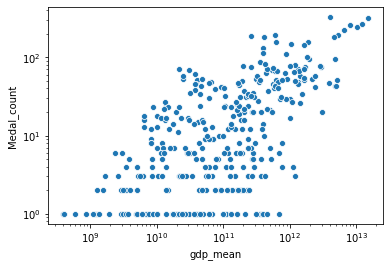

In [18]:
perCountryMedalsDf = final_df.groupby(['Year', 'Country'], as_index = False).agg({'Medal': ['count'], 'Value': ['mean']})

perCountryMedalsDf.columns = ['Year', 'Country', 'Medal_count', 'gdp_mean']

ax = sns.scatterplot(data=perCountryMedalsDf, x='gdp_mean', y="Medal_count", )
ax.set_xscale('log')
ax.set_yscale('log')


This visualization displays the relationship between our two main variables, a country's gdp and the number of medals they won at the Olympics. We grouped the data by year and country to pull out the different gdp's and the corresponding number of medals. After scaling both axes logarithmically, we see a linear relationship between a country's GDP and the number of medals they won in a given year. 

In [19]:
## function to categorize high and low based on year ranges

#Calculate midpoint GDP level to categorize a country has having higher GDP value if it has a value above this
#midpoint for a certain year or lower GDP if it has a value lower than the calculated midpoint

midpoint_val = (perCountryMedalsDf['gdp_mean'].max() - perCountryMedalsDf['gdp_mean'].min())/2
perCountryMedalsDf['category_val'] = perCountryMedalsDf['gdp_mean'].apply(lambda x: "low GDP" if x <= midpoint_val else "high GDP")
perCountryMedalsDf[perCountryMedalsDf['category_val'] == 'high GDP'].shape, perCountryMedalsDf[perCountryMedalsDf['category_val'] == 'low GDP'].shape
perCountryMedalsDf

,Year,Country,Medal_count,gdp_mean,category_val
0,1976.0,Australia,24,1.049742e+11,low GDP
1,1976.0,Austria,1,4.295998e+10,low GDP
2,1976.0,Belgium,9,7.149454e+10,low GDP
3,1976.0,Brazil,3,1.526780e+11,low GDP
4,1976.0,Canada,20,2.065756e+11,low GDP
...,...,...,...,...,...
352,2008.0,Ukraine,31,1.799924e+11,low GDP
353,2008.0,United Kingdom,77,2.890564e+12,low GDP
354,2008.0,United States,315,1.471858e+13,high GDP
355,2008.0,Uzbekistan,6,2.954944e+10,low GDP


In [20]:
midpoint_val = (final_df['Value'].max() - final_df['Value'].min())/2
final_df['category_val'] = final_df['Value'].apply(lambda x: "low GDP" if x <= midpoint_val else "high GDP")
final_df[final_df['category_val'] == 'high GDP'].shape, final_df[final_df['category_val'] == 'low GDP'].shape

((1087, 14), (8899, 14))

Next, we chose three countries (USA, GBR, CHN) to take a closer look at the data to see if there are any trends in the GDP changes over the years vs. the total number of medals received for each of these countries. We chose these three countries to see if the trends were consistent for both high and low GDP countries. We chose the United States because it is a country with a consistently high GDP. We then chose Great Britain because as another country with a high GDP, we could use its graphs to make sure the patterns we were seeing for United States were similar. Lastly, we chose China because it has a low GDP.

### Data Visualization for USA: GDP growth over the years vs. medals received for each Olympics

[Text(0, 0.5, 'GDP')]

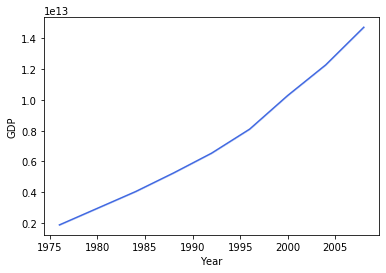

In [64]:
sns.lineplot(x="Year", y="Value", data=final_df[final_df["Country_Code"]=="USA"], color='royalblue').set(ylabel='GDP')


Year
1976.0    155
1984.0    333
1988.0    193
1992.0    224
1996.0    260
2000.0    248
2004.0    264
2008.0    315
Name: Medal, dtype: int64

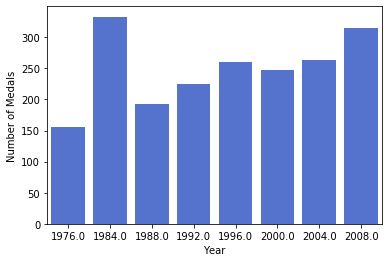

In [63]:
usa_df = final_df[final_df["Country_Code"]=="USA"]
sns.barplot(x = 'Year', y = 'Medal', data = usa_df.groupby('Year')['Medal'].count().reset_index(), color='royalblue').set(ylabel='Number of Medals')

usa_df.groupby('Year')['Medal'].count()

This visualization displays the trend in GDP changes over the years vs. the number of medals recieved for the United States. We chose this country, as it has a consistently high GDP. We scaled the axes in sets of 5 years and the GDP by 0.2. By plotting the overall trend, there appears to be a generally positive correlation between the medals won and the GDP over the span of 30 years with a few outliers as demonstrated by a potential increase or decrease in the number of medals won while the GDP consistently increases.

In [58]:
usa_info = usa_df.groupby(['Year', 'category_val'])['Medal'].count()
usa_info

Year    category_val
1976.0  low GDP         155
1984.0  low GDP         333
1988.0  low GDP         193
1992.0  low GDP         224
1996.0  high GDP        260
2000.0  high GDP        248
2004.0  high GDP        264
2008.0  high GDP        315
Name: Medal, dtype: int64

### Data Visualization for Great Britain: gdp growth over the years vs medals received for each Olympics

[Text(0, 0.5, 'GDP')]

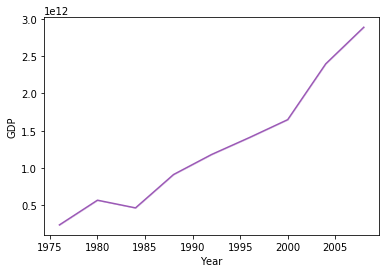

In [59]:
sns.lineplot(x="Year", y="Value", data=final_df[final_df["Country_Code"]=="GBR"], color='#9b59b6').set(ylabel='GDP')

Year
1976.0    32
1980.0    45
1984.0    72
1988.0    53
1992.0    50
1996.0    26
2000.0    55
2004.0    57
2008.0    77
Name: Medal, dtype: int64

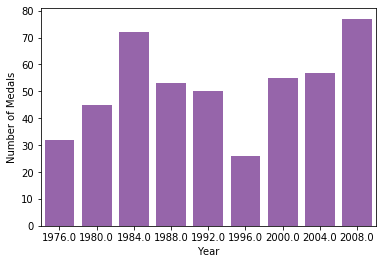

In [60]:
gbr_df = final_df[final_df["Country_Code"]=="GBR"]
sns.barplot(x = 'Year', y = 'Medal', data = gbr_df.groupby('Year')['Medal'].count().reset_index(), color='#9b59b6').set(ylabel='Number of Medals')

gbr_df.groupby('Year')['Medal'].count()

This visualization displays the trend in GDP changes over the years vs. the number of medals recieved for Great Britain. We chose this country, as it also has a high GDP. We scaled the axes in sets of 5 years and the GDP by 0.5. By plotting the overall trend, there appears to be a generally positive correlation between the medals won and the GDP over the span of 30 years; however, there also are a number of outliers as GDP steadily increases while the number of medals both increases and decreases. This visualization regarding Great Britain appears to have the largest number of outliers, compared to the United States and China.

### Data Visualization for China: gdp growth over the years vs medals received for each Olympics

[Text(0, 0.5, 'GDP')]

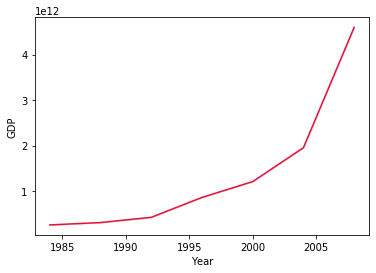

In [61]:
sns.lineplot(x="Year", y="Value", data=final_df[final_df["Country_Code"]=="CHN"],color='crimson').set(ylabel='GDP')

Year
1984.0     76
1988.0     53
1992.0     83
1996.0    110
2000.0     79
2004.0     94
2008.0    184
Name: Medal, dtype: int64

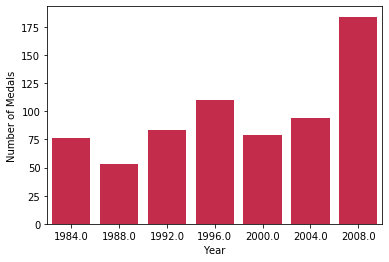

In [54]:
chn_df = final_df[final_df["Country_Code"]=="CHN"]
sns.barplot(x = 'Year', y = 'Medal', data = chn_df.groupby('Year')['Medal'].count().reset_index(), color='crimson').set(ylabel='Number of Medals')

chn_df.groupby('Year')['Medal'].count()

This visualization displays the trend in GDP changes over the years vs. the number of medals recieved for China. We chose this country, as it also has a high GDP. We scaled the axes in sets of 5 years and the GDP in increments of 1.0. By plotting the overall trend, there appears to be a weaker positive correlation between the medals won and the GDP over the span of 30 years; however, looking at the barplot, there are also a number of outliers as GDP steadily increases while the number of medals both increases and decreases. This visualization regarding China appears to have the least number of outliers, compared to the United States and China, and we hypothesize that this is due to China having the lowest GDP of the three countries.

# Data Analysis & Results

### **Perform T-test on Low and High GDP Distributions**

In [28]:
low_dist = perCountryMedalsDf[perCountryMedalsDf['category_val']=='low GDP']['Medal_count']
high_dist = perCountryMedalsDf[perCountryMedalsDf['category_val']=='high GDP']['Medal_count']

In [29]:
avg_low_dist = low_dist.mean()
avg_high_dist = high_dist.mean()
avg_low_dist, avg_high_dist

(25.209631728045327, 271.75)

There seems to be a difference in the average medals won for countries with low gdp vs. high gdp. To statistically test the difference, we will use a t-test.

In [30]:
t_val, p_val = ttest_ind(low_dist, high_dist)
t_val, p_val
# Check if statistical test passes significance, using an alpha value of 0.01. This code provided.
if p_val < 0.01:
    print('Data Science accomplished, there is a significant difference!')
else:
    print('There is NOT a significant difference!')
t_val, p_val

Data Science accomplished, there is a significant difference!


(-12.490578971595877, 6.310365935586765e-30)

### **Creating a Linear Model using Statsmodel and Patsy**

In [31]:
outcome, predictors = patsy.dmatrices('Medal_count ~ gdp_mean', perCountryMedalsDf)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            Medal_count   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     422.6
Date:                Thu, 19 Mar 2020   Prob (F-statistic):           2.05e-62
Time:                        16:48:40   Log-Likelihood:                -1740.8
No. Observations:                 357   AIC:                             3486.
Df Residuals:                     355   BIC:                             3493.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.4448      1.791      8.623      0.0

According to this statsmodel, the R-squared value is 0.543 and a good R-squared model is between 0-1 and has a value ~0.5 which means that our model is a good fit. The model that we can obtain from these above results is that: medals count  = 15.4448 + 2.359e-11 * gdp in which medals count is the variable we are predicting using our model and gdp is the predictor variable. Additionally, using an alpha value of 0.05, our predicted variable (medal_count) is significant since the p-value is less than our stated alpha value which means we reject the null hypothesis that the country's gdp value has no effect on the number of medals won in the corresponding year in the Olympics and the 'Intercept' variable is also significant so we can still include that variable in our final model. 

### **Checking the Linear Model**

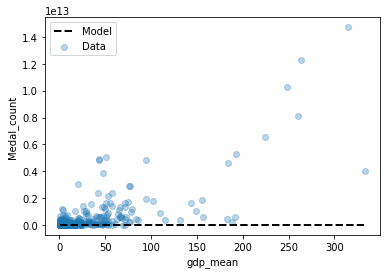

In [32]:
## Plot the model fit line

# Plot the orginal data (as before)
plt.scatter(perCountryMedalsDf['Medal_count'], perCountryMedalsDf['gdp_mean'], alpha=0.3, label='Data');

# Generate and plot the model fit line
xs = np.arange(perCountryMedalsDf['Medal_count'].min(), perCountryMedalsDf['Medal_count'].max())
ys = 0.7817 * xs
plt.plot(xs, ys, '--k', linewidth=2, label='Model')

plt.ylabel('Medal_count')
plt.xlabel('gdp_mean')
plt.legend();

# Ethics & Privacy

* We have permission to use this data because we found the Olympics datasets on Kaggle, a free public source of datasets, and the GDP dataset is sourced from The World Bank. 
* There aren't privacy concerns regarding our datasets because this is generally well-known data. Anyone can know how many people won the past Olympics.
* There is no bias in either of our datasets because these are pure facts reported by unbiased professionals (in the case of the economy dataset), and public verifiable facts (in the case of the Olympic Medals Dataset)
* We couldn't find any other issues that were potentially problematic in terms of data privacy and equitable impact because both of these datasets were public, and their use wouldn't affect any individual or group negatively through our use of it.

# Conclusion & Discussion

This project was designed to understand the influence of a country's economic factors on their performance in the Olympics. We used two datasets -- one from Kaggle, a public dataset source, and one from the World Bank -- for our analysis. Data regarding the economic factors, measured by the country's GDP, and the Olympic performance, measured by the number of medals (gold, silver, bronze) obtained that corresponding year, were filtered through and merged into a final dataframe. Through cleaning by removing null values and identifying and removing repeated columns, we were able to produce a datafram containing columns of similar values and uniform units for analysis. 

We first used our dataframe to create a data visualization in the form of a scatterplot, which showed a linear relationship between a country's GDP and the number of Olympic medals obtained that year. We then decided to narrow our examination by examining the data between three countries, the United States and Britain for their high GDPs and China for its low. Using lineplots and bargraphs for each country, we were able to study the trends of GDP changes vs. the number of medals won by a country over the span of 30 years. By then running a t-test, we were able to statistically test the difference in the average number of medals obtained per country in high vs. low gdp countries. Our test resulted in an alpha value of 0.05 allowing us to reject our null hypothesis that a country's GDP has no effect on the number of medals obtained that year.

A limitation is that we were unable to have information regarding the number of athletes sent from each country for each of the Olympics. That information would have been able to act as a measure of success or detail more about a country's overall performance at the Olympics. It also would have helped as an opportunity to add more detailed visualizations regarding the rations between the number of medals won to how many athletes actually competed for a country, instead of just analyzing the overall number of medals won to a country's GDP level. Another limitation was that the Olympics dataset only containing information on the countries that won any medals and did not contain any information about other competing countries. This could have helped to provide a more accurate and detailed analysis as there would be more observations between all the competing countries' performance and their corresponding GDP. This is why we were unable to include information about the GDP's of many countries while merging our dataset as they were not a part of our Olympic dataset. 

We believe this work will impact society as it changes how we judge and percieve the success of countries at sporting events, such as the Olympics. It also reminds us that there is more to any picture than what meets the eye, in the sense that there will always be implicit unfairness and bias. Particular countries do not have access to specific resources of success or are overall more poor as individuals. All of this plays into a country's success and shows us that how a country is doing economically impacts it in other areas, simply because of how society is structured.

# Team Contributions

- Niyonika Sheth: Ethics & Privacy, data sets, data visualizations, data analysis
- Sudiksha Sarvepalli: Data cleaning, data sets, data visualizations, data analysis, conclusion
- Maneesha Nagabandi: Project timeline proposal, data visualization, conclusion
- Charul Sharma: Team expectations, data visualization, conclusion
- Jaikrish Chitrarasu: Hypothesis, background and prior work, project check-in, data visualization 